<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Concept" data-toc-modified-id="Concept-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Concept</a></span></li><li><span><a href="#Practice" data-toc-modified-id="Practice-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Practice</a></span></li></ul></div>

In [1]:
import sys
import os
import time
import datetime
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

---

## Concept

In [2]:
def create_test_data():
    group = np.array(
        [[1.2, 1.1],
        [0.9, 0.7],
        [0, 0],
        [0, 0.3],
        [0.3, 0.2],
        [0.8, 0.6],
        [0.9, 0.8]]
    )
    labels = ["A", "A", "B", "B", "B", "A", "A"]
    
    data_set = pd.DataFrame(group, columns=["x", "y"])
    data_set["label"] = labels
    
    return data_set

$distance=\sqrt{(A_0-B_0)^2 + (A_1-B_1)^2}$

,x,y,label
0,1.2,1.1,A
1,0.9,0.7,A
2,0.0,0.0,B
3,0.0,0.3,B
4,0.3,0.2,B
5,0.8,0.6,A
6,0.9,0.8,A


{'distance_details': {'A': 3, 'B': 1},
 'sorted_distance': [('A', 3), ('B', 1)],
 'predict_label': 'A'}

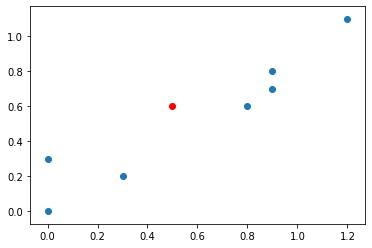

In [3]:
def classify_knn(single_vector, training_df, k):
    import operator
    
    row_cnt = training_df.shape[0]
    pure_data = training_df[["x", "y"]].values
    labels = training_df["label"].to_list()
    
    diff = np.tile(single_vector, (row_cnt, 1)) - pure_data
    diff_sq = diff**2
    distance = (diff_sq.sum(axis=1))**0.5 # d=1
    
    # sorted, in order to choose k nearest labels
    sorted_distance_index = distance.argsort() 
    
    class_count = {} #class_count = {'label': label_cnt}
    for i in range(k):
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    
    sorted_class_count = sorted(
        class_count.items(),
        key=operator.itemgetter(1), # use the dict value as key
        reverse=True
    )
    
    results = {
        "distance_details": class_count,
        "sorted_distance": sorted_class_count,
        "predict_label": sorted_class_count[0][0]
    }
    #predict_lable = sorted_class_count[0][0]
    return results
    

#test
training_df = create_test_data()
training_data = training_df[["x", "y"]]
input_vector=[0.5, 0.6]
training_df


results = classify_knn(
    single_vector=input_vector,
    training_df=training_df,
    k=4
)
results

#plt.plot(training_data["x"], training_data["y"], "o")
plt.scatter(training_data["x"], training_data["y"])
plt.plot(input_vector[0], input_vector[1], "o", color="red")

## Practice

In [4]:
rawdata_filepath = "data/dating_data.txt"

#========== convert raw data to matrix
# column1: yearly flight miles; 
# column2: the time pct for playing vedio games 
# column3: the volume of weekly ice-cream consuming 
# column4: labels
with open(rawdata_filepath) as f:
    lines = f.readlines()
    number_of_lines = len(lines)
    
    rawdata_matrix = np.zeros((number_of_lines, 3)) #
    rawdata_labels = [] #
    index = 0
    for line in lines:
        line = line.strip()
        elements = line.split("\t")
        rawdata_matrix[index, :] = elements[0:3]
        rawdata_labels.append(int(elements[-1]))
        index += 1

Text(0.5, 0, 'Yearly flight miles')

Text(0, 0.5, 'Time pct for playing vedio games')

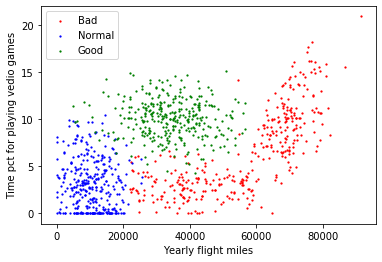

In [24]:
#========== plot raw data
fig = plt.figure()
ax = fig.add_subplot(111)


type1_x, type1_y = [], []
type2_x, type2_y = [], []
type3_x, type3_y = [], []
for i in range(rawdata_matrix.shape[0]):
    if rawdata_labels[i] == 1:
        type1_x.append(rawdata_matrix[i][0])
        type1_y.append(rawdata_matrix[i][1])
    elif rawdata_labels[i] == 2:
        type2_x.append(rawdata_matrix[i][0])
        type2_y.append(rawdata_matrix[i][1])
    else:
        type3_x.append(rawdata_matrix[i][0])
        type3_y.append(rawdata_matrix[i][1])
    
type1 = ax.scatter(
    x=type1_x,
    y=type1_y,
    s=1.5,
    c="red"
)
type2 = ax.scatter(
    x=type2_x,
    y=type2_y,
    s=1.5,
    c="blue"
)
type3 = ax.scatter(
    x=type3_x,
    y=type3_y,
    s=1.5,
    c="green"
)

plt.xlabel("Yearly flight miles")
plt.ylabel("Time pct for playing vedio games")
plt.legend(
    handles=(type1, type2, type3),
    labels=("Bad", "Normal", "Good")
)
plt.show()

In [34]:
df = pd.read_csv(
    "/Users/xu.zhu/Desktop/Data/CBSIP_Payment/BR/2021-03-10/MYBR_Order_20210309.csv",
    encoding="utf-8-sig"
)

df.isnull().any()

orderid          True
ordersn          True
seller_userid    True
grass_region     True
actual_amount    True
Remark           True
Update time      True
dtype: bool

In [35]:
df[df["orderid"].isnull()]

,orderid,ordersn,seller_userid,grass_region,actual_amount,Remark,Update time
292455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
293035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293038,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df = df[~df["orderid"].isnull()]
df.to_csv(
    "/Users/xu.zhu/Desktop/Data/CBSIP_Payment/BR/2021-03-10/MYBR_Order_20210309.csv",
    encoding="utf-8-sig",
    index=False
)